## Detecting Anomalies in Wafer Manufacturing
https://www.kaggle.com/arbazkhan971/anomaly-detection



Overview
Detecting Anomalies can be a difficult task and especially in the case of labeled datasets due to some level of human bias introduced while labeling the final product as anomalous or good. These giant manufacturing systems need to be monitored every 10 milliseconds to capture their behavior which brings in lots of information and what we call the Industrial IoT (IIOT). Also, hardly a manufacturer wants to create an anomalous product. Hence, the anomalies are like a needle in a haystack which renders the dataset that is significantly Imbalanced.

Capturing such a dataset using a machine learning model and making the model generalize can be fun. In this competition, we bring such a use-case from one of India's leading manufacturers of wafers(semiconductors). The dataset collected was anonymized to hide the feature names, also there are 1558 features that would require some serious domain knowledge to understand them.

However, In the era of Deep Learning, we are challenging the data science community to come up with an anomaly detection model that can generalize well on the unseen set of data(Test data). In this hackathon, you will be creating a machine learning/ deep learning model to classify the anomalies correctly using Area under the curve(AUC) as metric.

#### Dataset Description:
Train.csv - 1763 rows x 1559 columns
Test.csv - 756 rows x 1558 columns
Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission

#### Attribute Description:
Feature1 - Feature1558 - Represents the various attributes that were collected from the manufacturing machine

Class - (0 or 1) - Represents Good/Anomalous class labels for the products

In [46]:
import numpy as np
import pandas as pd
from sklearn_pandas import DataFrameMapper

import sys
import warnings
warnings.filterwarnings('ignore')

#visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

# Synthetic Minority Oversampling Technique
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from xgboost import XGBClassifier

#metric
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score,roc_curve
from sklearn.model_selection import validation_curve , StratifiedKFold



from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE

In [49]:
df = pd.read_csv("/Users/eugeneolkhovik/python_files/ML/GB/Participants_Data_WH18/Train.csv")
df_test = pd.read_csv("/Users/eugeneolkhovik/python_files/ML/GB/Participants_Data_WH18/Test.csv")


In [48]:
df_PCA

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,90,90,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,80,5.3333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,100,190,1.9000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.dtypes

feature_1         int64
feature_2         int64
feature_3       float64
feature_4         int64
feature_5         int64
                 ...   
feature_1555      int64
feature_1556      int64
feature_1557      int64
feature_1558      int64
Class             int64
Length: 1559, dtype: object

Text(0.5, 1.0, 'feature_3')

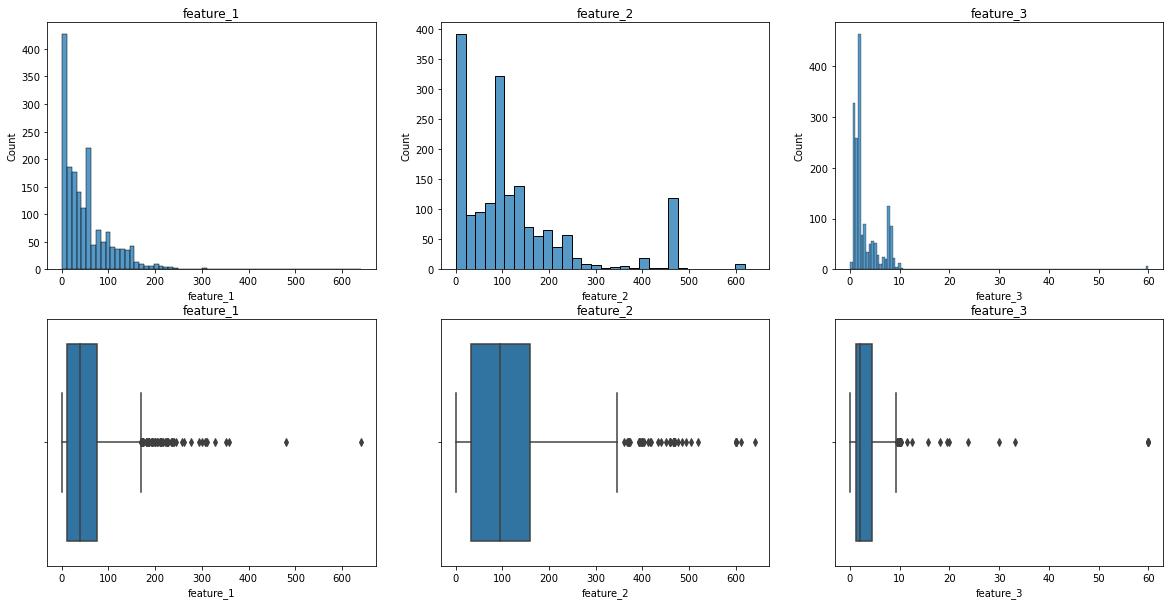

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(ax=axes[0,0],x = df["feature_1"], shrink=1)
axes[0,0].set_title(df["feature_1"].name)

sns.histplot(ax=axes[0,1],x = df["feature_2"], shrink=1)
axes[0,1].set_title(df["feature_2"].name)

sns.histplot(ax=axes[0,2], x = df["feature_3"], shrink=1)
axes[0,2].set_title(df["feature_3"].name)



sns.boxplot(ax=axes[1,0],x = df["feature_1"])
axes[1,0].set_title(df["feature_1"].name)

sns.boxplot(ax=axes[1,1],x = df["feature_2"])
axes[1,1].set_title(df["feature_2"].name)

sns.boxplot(ax=axes[1,2], x = df["feature_3"])
axes[1,2].set_title(df["feature_3"].name)

<AxesSubplot:xlabel='Class', ylabel='Count'>

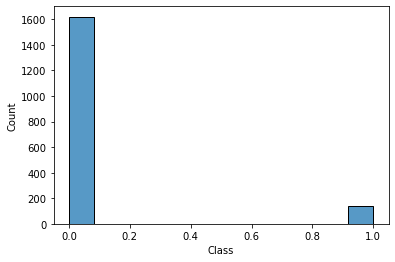

In [6]:
sns.histplot(df["Class"], shrink=1)

In [7]:
zero_class = len(df[df["Class"] == 0])
one_class =  len(df[df["Class"] == 1])
print(" Amount of Class == 0: ", zero_class , '\n', 
      "Amount of Class == 1: ", one_class, '\n', 
     "Class distribution: " , zero_class / one_class)

 Amount of Class == 0:  1620 
 Amount of Class == 1:  143 
 Class distribution:  11.328671328671328


In [8]:
corr = df.corr().abs() # comp cov matrix

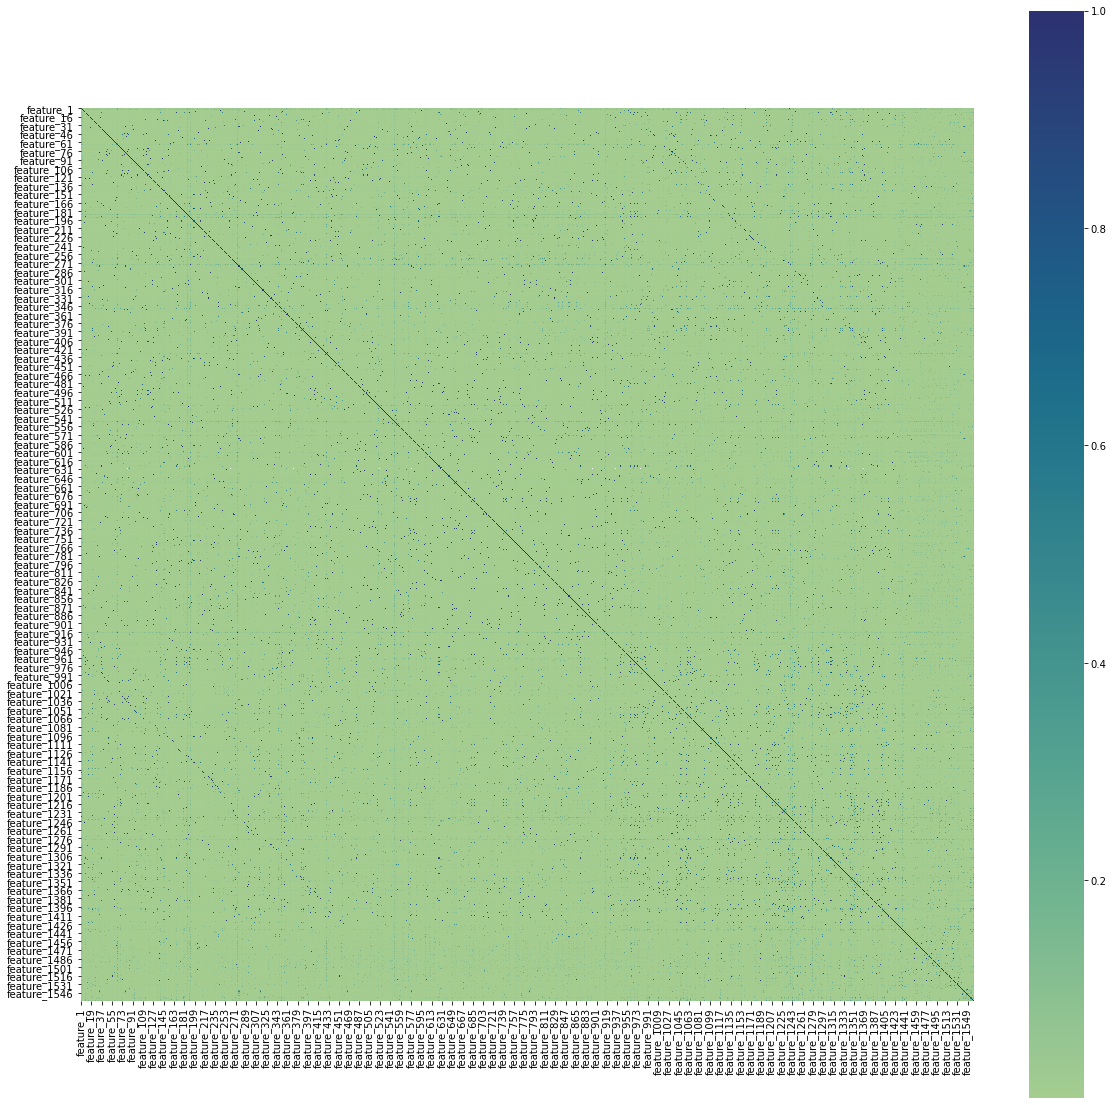

In [9]:
plt.figure(figsize=(20,20)) # figure size 
hm = sns.heatmap(corr,
                 cmap = "crest",
                 cbar=True,
                 square=True,
                 fmt='.2f')

In [10]:
# removing high-cor vars
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

df_test.drop(to_drop, axis=1, inplace=True)

In [11]:
print(len(to_drop), "params was droped")

842 params was droped


In [12]:
Y = df['Class']
df = df.drop("Class", axis = 1)

In [13]:
Y.value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [14]:
smote = SMOTE()
df_smote, y_smote = smote.fit_resample(df, Y)

In [15]:
df_smote.shape, y_smote.shape, y_smote.value_counts()

((3240, 716),
 (3240,),
 1    1620
 0    1620
 Name: Class, dtype: int64)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split( df_smote , y_smote, test_size = 0.3,random_state =42,
                                                    stratify = y_smote, shuffle = True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2268, 716) (972, 716) (2268,) (972,)


In [17]:
#DMatrix - internal data structure of xgb
dtrain = xgb.DMatrix(X_train, Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

In [18]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

Train dataset contains 2268 rows and 716 columns
Test dataset contains 972 rows and 716 columns


In [142]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": 0.1,
        "tree_method": 'exact',
        "max_depth": 3,
        "silent": 1,
    }
num_rounds = 100

In [143]:
# Train estimator 
watchlist  = [(dtest,'test'), (dtrain,'train')] # monitor values
xgb_model = xgb.train(params, dtrain, num_rounds, watchlist)

[19:32:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	test-auc:0.83314	train-auc:0.83775
[1]	test-auc:0.85061	train-auc:0.85073
[2]	test-auc:0.85061	train-auc:0.85073
[3]	test-auc:0.85051	train-auc:0.85062
[4]	test-auc:0.85061	train-auc:0.85073
[5]	test-auc:0.85061	train-auc:0.85073
[6]	test-auc:0.85242	train-auc:0.84920
[7]	test-auc:0.85242	train-auc:0.84920
[8]	test-auc:0.86131	train-auc:0.86665
[9]	test-auc:0.86828	train-auc:0.87595
[10]	test-auc:0.87545	train-auc:0.88313
[11]	test-auc:0.87548	train-auc:0.88311
[12]	test-auc:0.87468	train-auc:0.88192
[13]	test-auc:0.87870	train-auc:0.89012
[14]	test-auc:0.88028	train-auc:0.89108
[15]	test-auc:0.87954	train-auc:0.89285
[16]	test-auc:

In [144]:
preds_prob = xgb_model.predict(dtest)

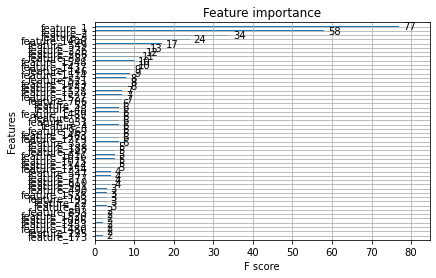

In [145]:
# F score
xgb.plot_importance(xgb_model, max_num_features= 50)
plt.rcParams["figure.figsize"] = (30,30)

In [146]:
predicted_labels = preds_prob > 0.5
print("Accuracy and F1 on the test set are: {} and {}".format(
    round(accuracy_score(Y_test, predicted_labels), 3),
    round(f1_score(Y_test, predicted_labels), 3)))

Accuracy and F1 on the test set are: 0.849 and 0.843


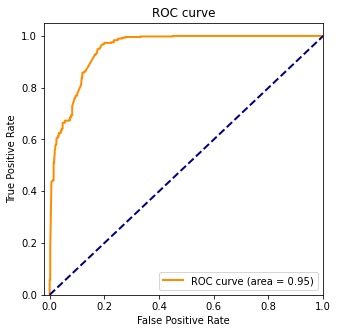

In [147]:
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(Y_test.values, preds_prob)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure(figsize=(5,5))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################



In [159]:
# PCA and t-SNE

In [160]:
df_PCA = pd.read_csv("/Users/eugeneolkhovik/python_files/ML/GB/Participants_Data_WH18/Train.csv")

In [161]:
df_PCA = df_PCA.fillna(value=0)

In [162]:
df_PCA

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
#MINMAX
mapper = DataFrameMapper([(df_PCA.columns, MinMaxScaler())])
scaled_features = mapper.fit_transform(df_PCA.copy(), 4)
df_PCA = pd.DataFrame(scaled_features, index=df_PCA.index, columns=df_PCA.columns)

In [164]:
df_PCA

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.154930,0.248826,0.026642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029734,0.128326,0.069143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.153365,0.233177,0.025227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061033,0.061033,0.016642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.017214,0.364632,0.324983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0.000000,0.000000,0.033309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.061033,0.311424,0.083310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.148670,0.339593,0.037823,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1761,0.023474,0.125196,0.084352,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
Y_PCA = df_PCA["Class"]
df_PCA = df_PCA.drop("Class", axis = 1)

In [166]:
pca = PCA(n_components=0.5, svd_solver = 'auto', whiten = True)
df_PCA =  pca.fit_transform(df_PCA)

In [167]:
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

[0.09112855 0.0550358  0.02996425 0.02606603 0.02000461 0.01794194
 0.01731234 0.01582988 0.01497782 0.01426561 0.01316928 0.01255159
 0.01222484 0.01162291 0.01155406 0.01120765 0.01052075 0.01040899
 0.00969431 0.00964661 0.00921692 0.00889899 0.0085463  0.00845211
 0.00824833 0.00758229 0.00739117 0.00734126 0.0071094  0.00679882
 0.0066497 ]
31


In [168]:
df_PCA = pd.DataFrame(df_PCA)

In [169]:
df_PCA

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.512298,-0.327987,0.731436,-0.206615,-0.632575,-0.410544,0.103752,0.471478,0.386042,-0.023996,...,-0.081247,-0.043095,-0.131005,-0.458101,-0.667604,0.040676,-0.212334,0.183528,0.325363,-0.642815
1,-0.383873,0.099558,-2.025939,2.742477,3.073028,-2.148952,0.677474,5.311330,-4.016866,3.334737,...,-0.500013,0.069020,-0.364459,-0.146137,-0.311300,-0.100382,-0.016278,-0.144185,0.418551,-0.052646
2,-0.459240,-0.397171,-0.247244,-0.525135,0.259000,0.263279,-0.229901,-0.426805,-0.200943,-0.204951,...,0.192756,0.164198,-0.290857,-0.074496,0.360650,0.164229,0.196179,-0.033079,-0.040855,0.190318
3,-0.398983,-0.318586,-0.189184,0.435716,-1.144576,-0.502472,0.564752,0.624475,0.243933,-0.499118,...,0.198938,0.220481,0.050318,-0.179173,-0.239696,0.093654,-0.119259,-0.035162,0.085202,-0.062212
4,-0.433960,-0.331114,-0.238124,-0.395259,0.238290,0.184082,-0.164579,-0.175050,-0.068736,-0.043636,...,0.018825,0.007425,-0.251994,-0.243636,0.100363,-0.068480,0.068386,0.257657,0.228895,-0.356171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.302986,-0.370619,-1.016314,0.194753,-0.471406,0.039006,0.245606,-0.051315,-0.269864,-0.547064,...,0.286366,0.315702,-0.159060,-0.134761,0.269368,0.061334,0.002737,0.073450,0.078077,0.333482
1759,-0.466325,-0.343654,-0.168790,-0.481341,0.226142,0.069452,-0.248827,-0.034062,0.040974,-0.067343,...,-0.289751,-0.733985,-0.218654,-1.140827,-0.020194,1.207529,0.486917,0.644590,-1.937656,-0.452862
1760,-0.461523,-0.274002,-0.247738,-0.403767,0.418480,0.087670,-0.225783,-0.164103,0.025359,0.012192,...,-0.416090,-0.610317,-0.240433,-0.864677,0.356079,0.847500,0.669842,0.510357,-1.903793,0.298141
1761,-0.359638,-0.338831,-1.191291,0.278782,-0.364497,-0.025157,0.370464,0.054918,-0.131225,-0.714028,...,0.421543,-0.373780,-0.137853,-0.917853,1.031439,1.475641,1.028369,0.808059,-3.294283,1.480718


In [170]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(df_PCA, Y_PCA,shuffle=True, random_state= 1001,
                                                                    test_size= 0.3, stratify = Y_PCA)

In [171]:
print(X_train_PCA.shape, X_test_PCA.shape, Y_train_PCA.shape, Y_test_PCA.shape)

(1234, 31) (529, 31) (1234,) (529,)


In [172]:
dtrain_PCA = xgb.DMatrix(X_train_PCA, Y_train_PCA)
dtest_PCA = xgb.DMatrix(X_test_PCA, Y_test_PCA)

In [173]:
params_PCA = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": 0.05,
        "tree_method": 'exact',
        "max_depth": 3,
        "silent": 1,
    }
num_rounds = 100

In [174]:
watchlist_PCA  = [(dtest_PCA,'test'), (dtrain_PCA,'train')] # monitor values
xgb_model_PCA = xgb.train(params_PCA, dtrain_PCA, num_rounds, watchlist_PCA, early_stopping_rounds = 10)

[19:41:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	test-auc:0.76471	train-auc:0.83012
[1]	test-auc:0.78211	train-auc:0.84360
[2]	test-auc:0.78373	train-auc:0.84391
[3]	test-auc:0.78493	train-auc:0.84620
[4]	test-auc:0.78455	train-auc:0.84649
[5]	test-auc:0.78421	train-auc:0.84711
[6]	test-auc:0.78484	train-auc:0.84766
[7]	test-auc:0.78627	train-auc:0.84906
[8]	test-auc:0.78493	train-auc:0.84930
[9]	test-auc:0.78376	train-auc:0.85136
[10]	test-auc:0.78419	train-auc:0.85177
[11]	test-auc:0.78405	train-auc:0.85213
[12]	test-auc:0.78376	train-auc:0.85246
[13]	test-auc:0.78347	train-auc:0.85274
[14]	test-auc:0.78247	train-auc:0.85294
[15]	test-auc:0.78232	train-auc:0.85310
[16]	test-auc:

In [175]:
preds_prob_PCA = xgb_model_PCA.predict(dtest_PCA)

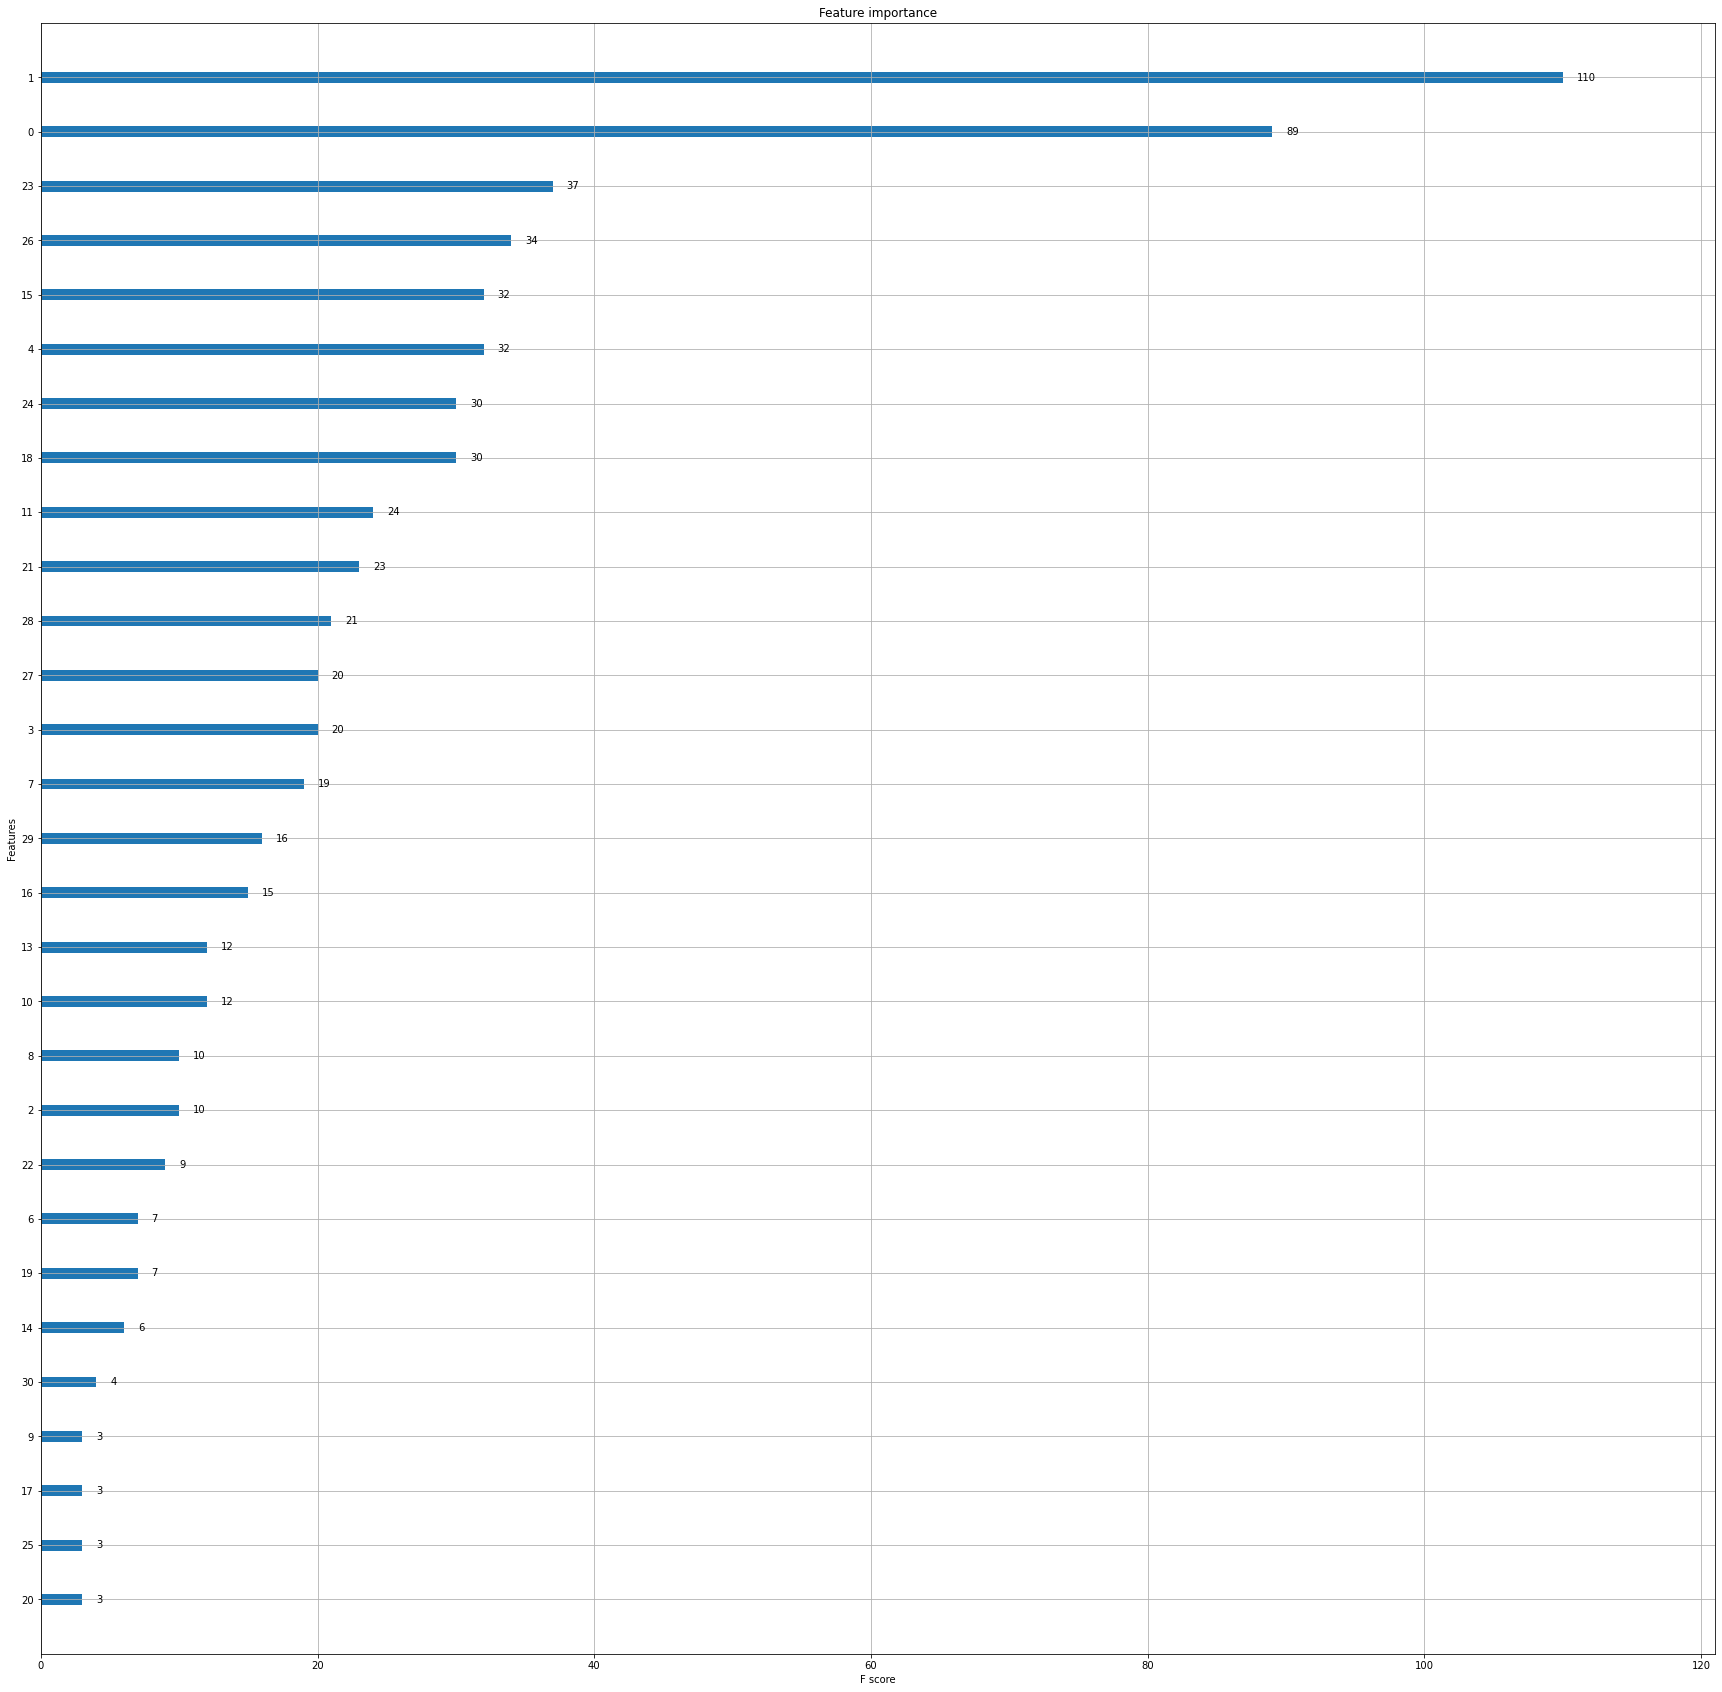

In [176]:
# F score
xgb.plot_importance(xgb_model_PCA, max_num_features= 50)
plt.rcParams["figure.figsize"] = (30,30)

In [177]:
predicted_labels_PCA = preds_prob_PCA > 0.5
print("Accuracy on the test set are: {}".format(
    round(accuracy_score(Y_test_PCA, predicted_labels_PCA), 3)))

Accuracy on the test set are: 0.907


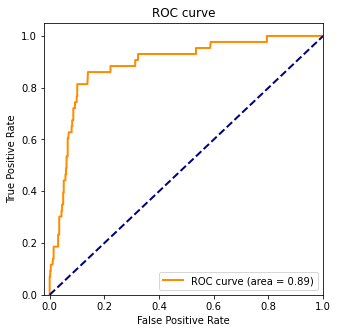

In [178]:
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(Y_test_PCA.values, preds_prob_PCA)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure(figsize=(5,5))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################

In [32]:
# GRID SEARCH

In [33]:
params_grid = {
        
        'min_child_weight': [1, 5, 10],
        
        'gamma': [0.3, 0.6, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'scale_pos_weight': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [34]:
xgb = XGBClassifier( 
                    nthread=1,
                    silent=True,
                    n_estimators = num_rounds,
                    objective='binary:logistic',
                    eval_metric = "auc")
       

In [35]:
folds = 5
param_comb = 50

In [2]:
skf = StratifiedKFold(n_splits= folds, shuffle = True, random_state = 1001)

NameError: name 'folds' is not defined

In [37]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params_grid,
                                   n_iter=param_comb,
                                   scoring='roc_auc',
                                   n_jobs=4,
                                   cv=skf.split(X_train,Y_train),
                                   verbose=3,
                                   random_state=1001 )

# grid = GridSearchCV(estimator=xgb, param_grid=params_grid, 
#                      scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3 )

In [38]:

random_search.fit(X_train, Y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
print('\n All results:')
print(random_search.cv_results_)





In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
preds_prob_RS = random_search.predict_proba(X_test)